Задача 3 Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Используя градиентный спуск, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет c intercept.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression as lr

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

Для определения возможности применения метода линейной регрессии смотрим на коэффициент корркляции Пирсона и график рапределения зависимости значения поведенческого кредитного скоринга заёмщиков банка от их заработной платы.

In [3]:
# находим коэффициент корркляции Пирсона
r = np.corrcoef(zp, ks)[1][0]
print('коэффициент корркляции Пирсона =', r)

коэффициент корркляции Пирсона = 0.8874900920739162


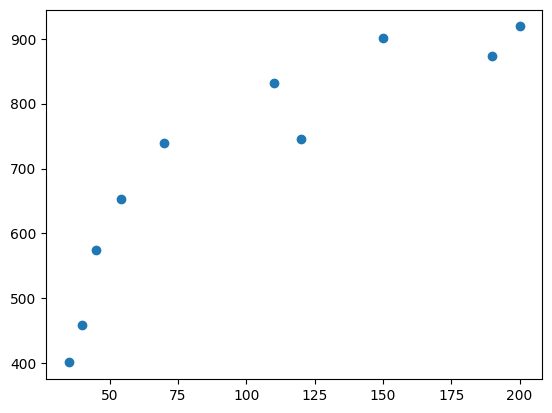

In [4]:
# строим график рапределения зависимости значения поведенческого кредитного скоринга заёмщиков банка от их заработной платы.
plt.scatter(zp, ks)

График и коэффициент корркляции Пирсона позволяют нам предположить о существовании линейной зависимости значения поведенческого кредитного скоринга заёмщиков банка от их заработной платы.

Вычисляем коэффициенты линейной зависимости методом градиентного спуска.

In [5]:
alpha = 1e-7
b0 = 0.1
b1 = 0.1

In [6]:
 # Объявляем функцию потерь

def mse_(x, y, b1, b0):
    return ((sum(y - x * b1 - b0)) ** 2) / n

In [7]:
# Объявляем производную функции потерь по b0

def mse_pb0(x, y, b1, b0):
    return (sum(b0 - y + x * b1)) * (2 / n)

In [8]:
# Объявляем производную функции потерь по b1

def mse_pb1(x, y, b1, b0):
    return (sum((x * b1 - y + b0) * x)) * (2 / n)

In [9]:
# вычисляем коэффициенты b0 и b1
st = 0
while b1 - st > alpha:
    st = b1
    b0 -= mse_pb0(zp, ks, b1, b0) / 10
    b1 -= alpha * mse_pb1(zp, ks, b1, b0)
print('b0 =', b0)
print('b1 =', b1)

b0 = 444.1920256113098
b1 = 2.6203947261284424


Проверяем вычсленную модель

In [10]:
# находим остатки регрессии
y = zp * b1 + b0
resid = ks - y
resid

array([-134.90584103,   11.89021171,  -68.06702358,  -49.27097084,
        -90.00781466,  111.38034356,   67.30665918,   64.74876547,
        -12.63939275,   99.56455451])

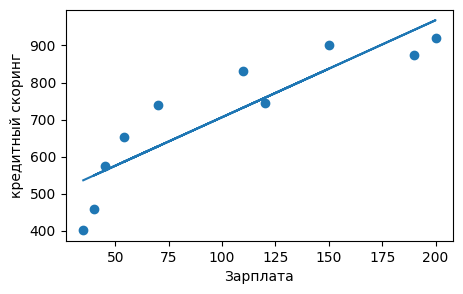

In [11]:
# строим график
plt.figure(figsize=(5, 3))
plt.plot(zp, y)
plt.scatter(zp, ks)
plt.xlabel('Зарплата')
plt.ylabel('кредитный скоринг')
plt.show()

In [12]:
# проверка на нормальность
stats.shapiro(resid)

ShapiroResult(statistic=0.9479588270187378, pvalue=0.6444166898727417)

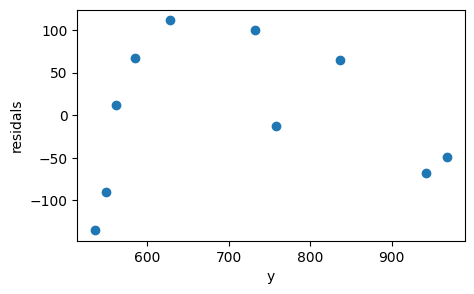

In [13]:
# проверка на Гомоскедастичность
plt.figure(figsize=(5, 3))
plt.scatter(y, resid)
plt.xlabel('y')
plt.ylabel('residals')
plt.show()

In [14]:
# вычисляем коэффициент детерминации
R2 = r ** 2
print('коэффициент детерминации =', R2)

коэффициент детерминации = 0.7876386635293682


In [15]:
# оцениваем значимость модели линейной регрессии используя критерий Фишера
F = (R2 / 1) / ((1 - R2) / (n - 1 - 1))
print('F =', F)

F = 29.671640859664432


Табличное значение критерия Фишера равно 5,32 расчётное значение равно 29.67. Делаем вывод что модель является статистически значимой.